## __Time_Series_Analysis__

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [54]:
df = sns.load_dataset('flights')
df.sample()

,year,month,passengers
92,1956,Sep,355


In [55]:
df['yearMonth'] = '01-'+df['month'].astype(str)+'-'+df['year'].astype(str) # feature type is not datetime 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
 3   yearMonth   144 non-null    object  
dtypes: category(1), int64(2), object(1)
memory usage: 4.0+ KB
None


In [56]:
df['yearMonth'] = pd.to_datetime('01-'+df['month'].astype(str)+'-'+df['year'].astype(str)) # convert to datatime 
print(df.info())
print(df.head()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   year        144 non-null    int64         
 1   month       144 non-null    category      
 2   passengers  144 non-null    int64         
 3   yearMonth   144 non-null    datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(2)
memory usage: 4.0 KB
None
   year month  passengers  yearMonth
0  1949   Jan         112 1949-01-01
1  1949   Feb         118 1949-02-01
2  1949   Mar         132 1949-03-01
3  1949   Apr         129 1949-04-01
4  1949   May         121 1949-05-01


In [57]:
df.set_index('yearMonth',inplace=True)
df.head()

,year,month,passengers
yearMonth,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121


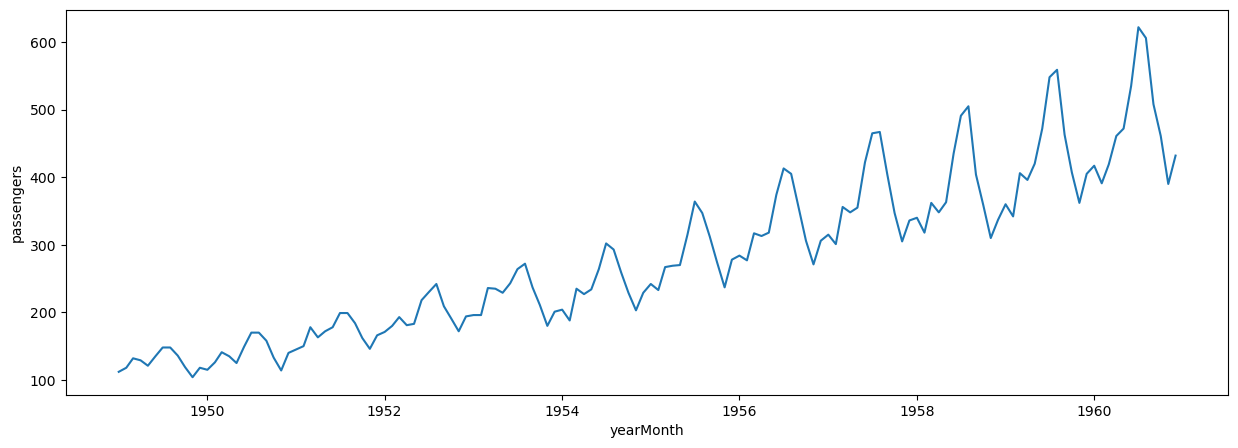

In [58]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df,x=df.index,y=df['passengers'])
plt.show()

In [59]:
# calcaulate the plot of rolling mean and standard deviation
df['rollMean'] = df['passengers'].rolling(window=12).mean() ## window = 12 parameter shiftes the time by 12 column
df['rollStd'] = df['passengers'].rolling(window=12).std()

In [60]:
print(df['rollMean'])
print(df['rollStd']) # it will take rolling mean after first 12 values

yearMonth
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
                 ...    
1960-08-01    463.333333
1960-09-01    467.083333
1960-10-01    471.583333
1960-11-01    473.916667
1960-12-01    476.166667
Name: rollMean, Length: 144, dtype: float64
yearMonth
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
                ...    
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125
Name: rollStd, Length: 144, dtype: float64


In [110]:
df.head(10)

,year,month,passengers,rollMean,rollStd
yearMonth,,,,,
1949-01-01,1949,Jan,112,NaN,NaN
1949-02-01,1949,Feb,118,NaN,NaN
1949-03-01,1949,Mar,132,NaN,NaN
1949-04-01,1949,Apr,129,NaN,NaN
1949-05-01,1949,May,121,NaN,NaN
1949-06-01,1949,Jun,135,NaN,NaN
1949-07-01,1949,Jul,148,NaN,NaN
1949-08-01,1949,Aug,148,NaN,NaN
1949-09-01,1949,Sep,136,NaN,NaN


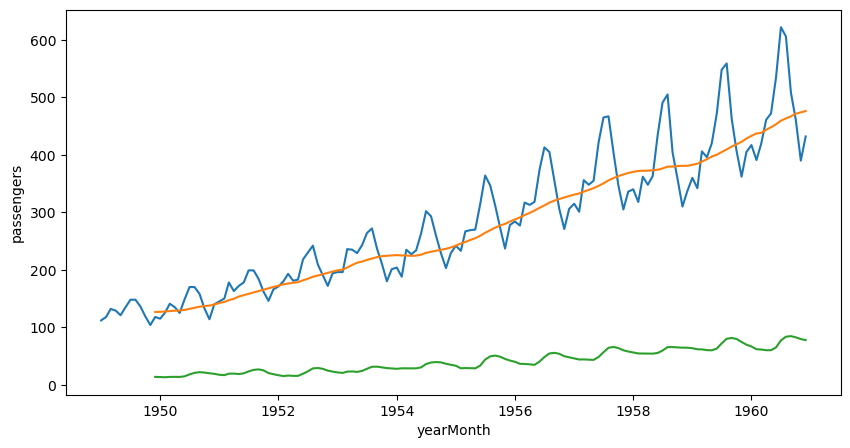

In [61]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x=df.index,y=df['passengers'])
sns.lineplot(data=df,x=df.index,y=df['rollMean'])
sns.lineplot(data=df,x=df.index,y=df['rollStd'])
plt.show()

In [62]:
# conclusion : Mean is not stationary , SD is not stationary; so our data is not stationary
# Now let us perform the ADF test 

In [111]:
from statsmodels.tsa.stattools import adfuller
adfTest = adfuller(df['passengers'])
adfTest
# Interpret these value below by converting into series

(0.8153688792060528,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [64]:
stats = pd.Series(adfTest[0:4],index=['Test Statistics','p-value','#lags used','number of observation'])
stats

Test Statistics            0.815369
p-value                    0.991880
#lags used                13.000000
number of observation    130.000000
dtype: float64

In [65]:
for key, values in adfTest[4].items():
    print('critically',key,':',values)

critically 1% : -3.4816817173418295
critically 5% : -2.8840418343195267
critically 10% : -2.578770059171598


In [121]:
def test_stationary(df,var):
    df['rollMean'] = df[var].rolling(window=12).mean() ## window = 12 parameter shiftes the time by 12 column
    df['rollStd'] = df[var].rolling(window=12).std()
    from statsmodels.tsa.stattools import adfuller
    adfTest = adfuller(df[var])
    stats = pd.Series(adfTest[0:4],index=['Test Statistics','p-value','#lags used','number of observation'])
    for key, values in adfTest[4].items():
        print('critically',key,':',values)
    plt.figure(figsize=(10,5))
    sns.lineplot(data=df,x=df.index,y=var)
    sns.lineplot(data=df,x=df.index,y='rollMean')
    sns.lineplot(data=df,x=df.index,y='rollStd')
    plt.show()
    from statsmodels.tsa.stattools import adfuller
    adfTest = adfuller(df[var])
    print(adfTest)

In [122]:
# test_stationary(df,'passengers')

In [123]:
air_df = df[['passengers']].copy() # double bracket cuz its list within a list
air_df.head()

,passengers
yearMonth,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [124]:
air_df['shift'] = air_df.passengers.shift(10) # create a new column which will contain shifted value from passengers 
air_df['shiftDiff'] = air_df['passengers'] - air_df['shift']
air_df.head(20)

,passengers,shift,shiftDiff
yearMonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,NaN,NaN
1949-07-01,148,NaN,NaN
1949-08-01,148,NaN,NaN
1949-09-01,136,NaN,NaN


In [125]:
shifted_Data = air_df.dropna()
shifted_Data

,passengers,shift,shiftDiff
yearMonth,,,
1949-11-01,104,112.0,-8.0
1949-12-01,118,118.0,0.0
1950-01-01,115,132.0,-17.0
1950-02-01,126,129.0,-3.0
1950-03-01,141,121.0,20.0
...,...,...,...
1960-08-01,606,407.0,199.0
1960-09-01,508,362.0,146.0
1960-10-01,461,405.0,56.0


/tmp/ipykernel_21051/1835480722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollMean'] = df[var].rolling(window=12).mean() ## window = 12 parameter shiftes the time by 12 column
/tmp/ipykernel_21051/1835480722.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollStd'] = df[var].rolling(window=12).std()


critically 1% : -3.486055829282407
critically 5% : -2.8859430324074076
critically 10% : -2.5797850694444446


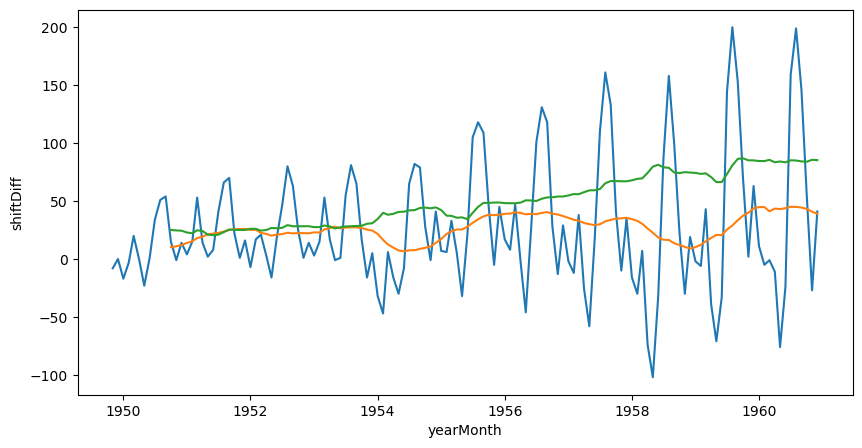

(-3.671914270744786, 0.004526004061261753, 13, 120, {'1%': -3.486055829282407, '5%': -2.8859430324074076, '10%': -2.5797850694444446}, 999.3477426300124)


In [126]:
test_stationary(shifted_Data,'shiftDiff')

# Interpret these value below by converting into series

### __ARIMA__

In [105]:
airP = df[['passengers']].copy(deep=True)
airP['FirstDiff'] = airP[['passengers']].diff(1) # for ARIMA
#airP['FirstDiff'] = airP[['passengers']].diff(12) # for

In [106]:
print(airP.head())

            passengers  FirstDiff
yearMonth                        
1949-01-01         112        NaN
1949-02-01         118        6.0
1949-03-01         132       14.0
1949-04-01         129       -3.0
1949-05-01         121       -8.0


In [107]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

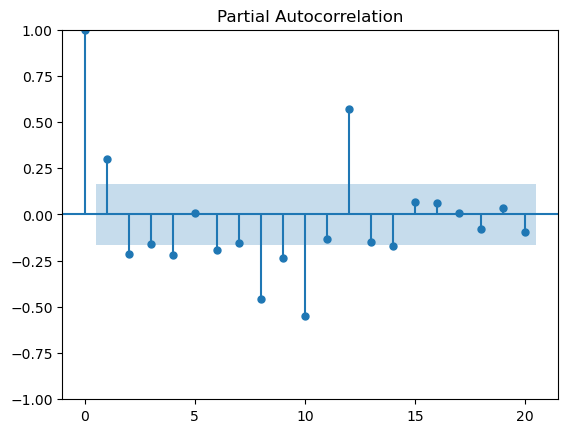

In [108]:
plot_pacf(airP['FirstDiff'].dropna(),lags=20)
plt.show()

* the shaded area is insignificant area
* PACF gives us the auto regressive values
* frist 'p' is 1 (the axis co-ordinate), whoes value is ~0.31 (the y-axis co-ordinate)
* so, significant P values are 1 ,2 ,3, 4, etc  

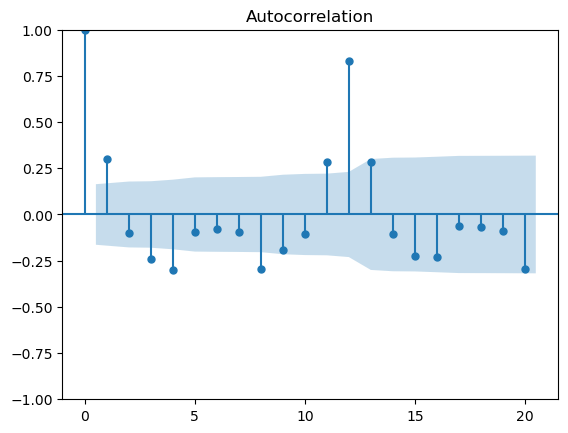

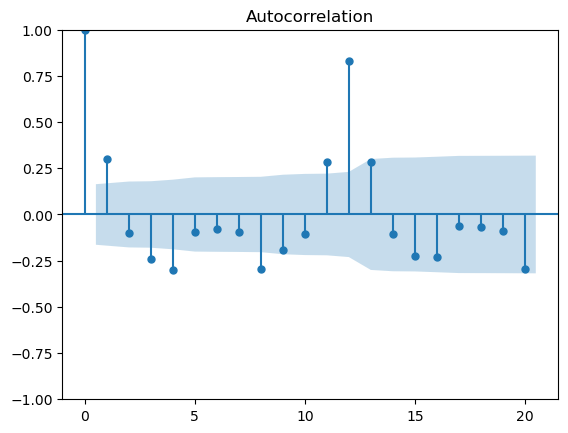

In [109]:
plot_acf(airP['FirstDiff'].dropna(),lags=20)

            passengers  FirstDiff
yearMonth                        
1957-01-01         315        9.0
1957-02-01         301      -14.0
1957-03-01         356       55.0
1957-04-01         348       -8.0
1957-05-01         355        7.0
            passengers  FirstDiff
yearMonth                        
1957-06-01         422       67.0
1957-07-01         465       43.0
1957-08-01         467        2.0
1957-09-01         404      -63.0
1957-10-01         347      -57.0


/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


            passengers  FirstDiff   arimaPred
yearMonth                                    
1960-08-01         606      -16.0  341.111333
1960-09-01         508      -98.0  341.111333
1960-10-01         461      -47.0  341.111333
1960-11-01         390      -71.0  341.111333
1960-12-01         432       42.0  341.111333


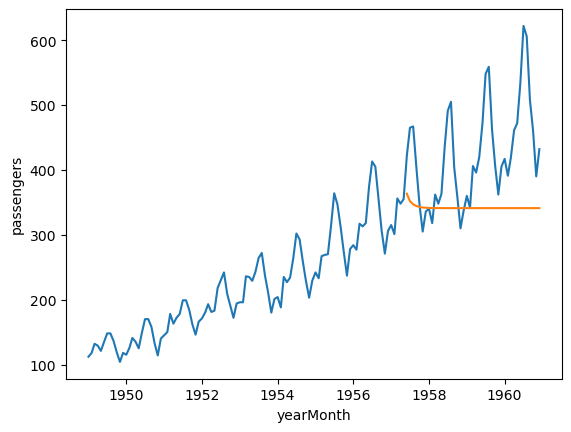

In [127]:
# Results of ACF are similar to that of PACF
# Interpretation: We got q. Significant q values are 1, 3, 4, 8, etc) 

# Let us take p = 1, q = 3 (both are significant) and d = 1 (already known)

# Build ARIMA model
train = airP[:round(len(airP)*70/100)] # Take the first 70% data
print(train.tail()) # Just to check where it ends

test = airP[round(len(airP)*70/100):] # Take the last 30% data, starting from 71%
print(test.head()) # Just to check where it starts

model = ARIMA(train['passengers'],order=(1,1,3)) # Parameters: p, d, q
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0],end=test.index[-1])
airP['arimaPred'] = prediction
print(airP.tail())

# Plot

sns.lineplot(data=airP,x=airP.index,y='passengers')
sns.lineplot(data=airP,x=airP.index,y='arimaPred')
plt.show()

# Conclusion: The ARIMA prediction is not good



            passengers
yearMonth             
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


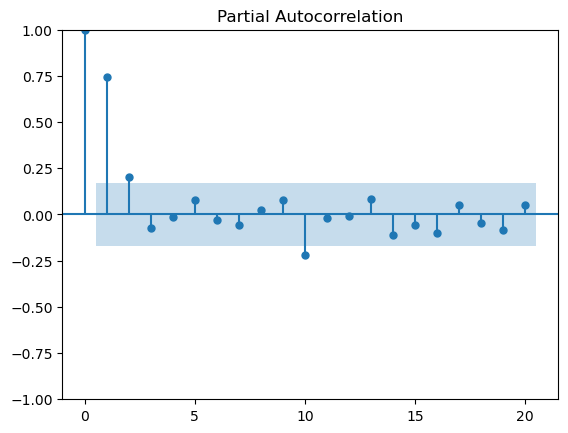

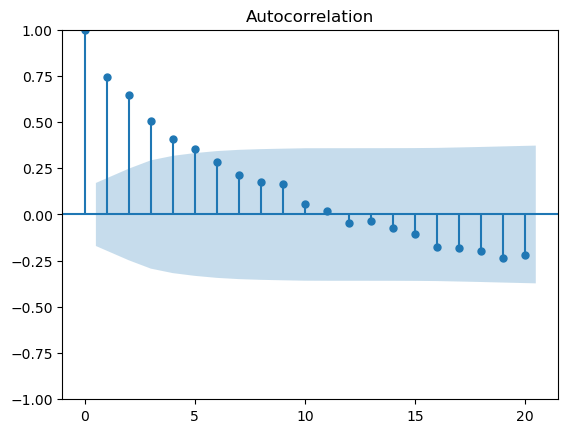

In [129]:
df = sns.load_dataset('flights')
df['yearMonth'] = pd.to_datetime("01-"+df['month'].astype(str)+"-"+df['year'].astype(str))
df.set_index('yearMonth',inplace=True) # inplace will make the change permanent to the DF

airP = df[['passengers']].copy(deep=True)
print(airP.head())

# Create columns for one month and one year lagged data
airP['firstDiff'] = airP['passengers'].diff()
airP['Diff12'] = airP['passengers'].diff(12) # This will show nulls to start with

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_pacf(airP['Diff12'].dropna(),lags=20)
plt.show() 

plot_acf(airP['Diff12'].dropna(),lags=20)
plt.show()

In [132]:
train = airP[:round(len(airP)*70/100)] # Take the first 70% data
test = airP[round(len(airP)*70/100):] # Take the last 30% data, starting from 71%

# First ARIMA prediction
model = ARIMA(train['passengers'],order=(1,1,3)) # Parameters: p, d, q
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0],end=test.index[-1])
airP['arimaPred'] = prediction

# Now SARIMAX prediction
model = SARIMAX(train['passengers'],order=(1,1,3),seasonal_order=(2,1,2,12))
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0],end=test.index[-1])
airP['sarimaxPred'] = prediction
print(airP.tail())

/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.19915D+00    |proj g|=  1.99099D-01

At iterate    5    f=  3.16460D+00    |proj g|=  1.98386D-02

At iterate   10    f=  3.15884D+00    |proj g|=  5.57427D-03

At iterate   15    f=  3.14526D+00    |proj g|=  3.63883D-02

At iterate   20    f=  3.13312D+00    |proj g|=  2.27653D-02

At iterate   25    f=  3.12947D+00    |proj g|=  8.37572D-03

At iterate   30    f=  3.12904D+00    |proj g|=  1.39137D-03

At iterate   35    f=  3.12897D+00    |proj g|=  2.99163D-03

At iterate   40    f=  3.12885D+00    |proj g|=  2.68103D-04

At iterate   45    f=  3.12885D+00    |proj g|=  1.16398D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

            passengers  firstDiff  Diff12  arimaPred  sarimaxPred
yearMonth                                                        
1949-01-01         112        NaN     NaN        NaN          NaN
1949-02-01         118        6.0     NaN        NaN          NaN
1949-03-01         132       14.0     NaN        NaN          NaN
1949-04-01         129       -3.0     NaN        NaN          NaN
1949-05-01         121       -8.0     NaN        NaN          NaN


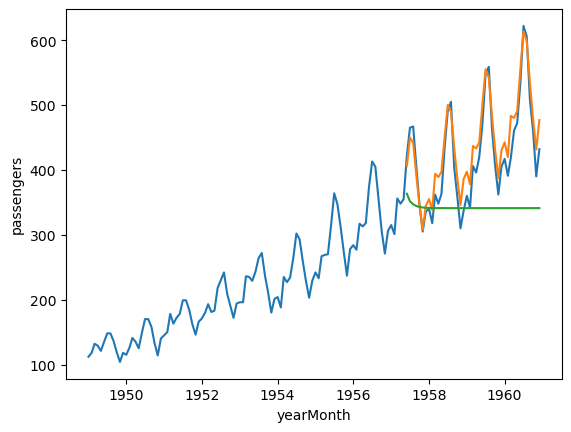

In [133]:
# Data looks better

# Plot
airP.dropna()
print(airP.head())
sns.lineplot(data=airP,x=airP.index,y='passengers')
sns.lineplot(data=airP,x=airP.index,y='sarimaxPred')
sns.lineplot(data=airP,x=airP.index,y='arimaPred')
plt.show()

In [149]:
# Compared to ARIMA, SARIMAX is much better

# Future prediction

# First check the last date in our dataset
print(airP.tail())

# MS: Month Start frequency
# Create a data frame to hold index values from 01.01.61 to 01.12.62
futureDate = pd.DataFrame(pd.date_range(start='1961-01-01', end='1965-12-01',freq='MS'),columns=['Dates'])
futureDate.set_index('Dates',inplace=True)
print(futureDate.head())

# Predict and print
print(model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1]))

            passengers  firstDiff  Diff12   arimaPred  sarimaxPred
yearMonth                                                         
1960-08-01         606      -16.0    47.0  341.111333   598.358104
1960-09-01         508      -98.0    45.0  341.111333   533.987752
1960-10-01         461      -47.0    54.0  341.111333   478.762465
1960-11-01         390      -71.0    28.0  341.111333   431.407639
1960-12-01         432       42.0    27.0  341.111333   476.770652
Empty DataFrame
Columns: []
Index: [1961-01-01 00:00:00, 1961-02-01 00:00:00, 1961-03-01 00:00:00, 1961-04-01 00:00:00, 1961-05-01 00:00:00]
1961-01-01    490.593629
1961-02-01    465.060680
1961-03-01    532.848529
1961-04-01    530.138103
1961-05-01    541.966218
1961-06-01    612.598924
1961-07-01    674.606182
1961-08-01    657.113066
1961-09-01    588.119463
1961-10-01    528.843346
1961-11-01    478.541771
1961-12-01    526.596300
1962-01-01    541.483921
1962-02-01    513.095586
1962-03-01    585.179906
1962-04-01    5

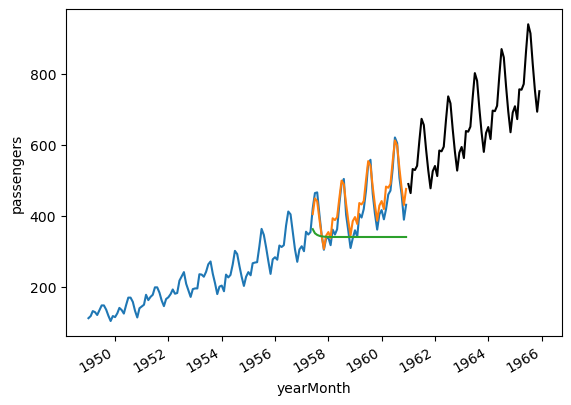

In [150]:

# Plot

airP.dropna()
sns.lineplot(data=airP,x=airP.index,y='passengers')
sns.lineplot(data=airP,x=airP.index,y='sarimaxPred')
sns.lineplot(data=airP,x=airP.index,y='arimaPred')
model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1]).plot(color='black')
plt.show()
